In [10]:
import pandas as pd
import numpy as np

In [6]:
weather=pd.read_csv("cleaned.csv")

In [7]:
weather.head()

,hour_dt,ride_count,temperature_2m (°C),precipitation (mm),wind_speed_10m (km/h),relative_humidity_2m (%)
0,1/1/2024 1:00,272,2.3,0.0,5.4,88
1,1/1/2024 2:00,324,0.9,0.0,6.6,91
2,1/1/2024 3:00,237,0.9,0.0,6.0,92
3,1/1/2024 4:00,60,0.6,0.0,5.8,92
4,1/1/2024 5:00,26,1.1,0.6,7.3,91


In [8]:
weather['hour_dt'] = pd.to_datetime(weather['hour_dt'])
weather['date'] = weather['hour_dt'].dt.date
weather['hour'] = weather['hour_dt'].dt.hour

In [ ]:
#creating a column to check when it rained after 10am
late_rain_days = weather[(weather['hour'] >= 10) & (weather['precipitation (mm)'] > 0)].date.unique()


In [ ]:
#dividing the late_rain_days into group A and group B
np.random.seed(42)  
group_b_days = np.random.choice(late_rain_days, size=len(late_rain_days)//2, replace=False)

weather['group'] = weather['date'].apply(
    lambda x: 'B' if x in group_b_days else ('A' if x in late_rain_days else 'Other')
)


In [12]:
# Simulate a +20% increase in early rides for Group B (6–9 AM)
weather['simulated_ride_count'] = weather['ride_count']
mask = (weather['group'] == 'B') & (weather['hour'].between(6, 9))

weather.loc[mask, 'simulated_ride_count'] *= 1.20


C:\Users\nithi\AppData\Local\Temp\ipykernel_6360\10047809.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  37.2   55.2   86.4   90.    14.4   43.2   63.6  289.2   37.2   96.
  183.6  342.    18.    57.6   64.8  127.2   78.   266.4  722.4 1297.2
   82.8  264.   554.4  912.    90.   292.8  750.  1369.2   79.2  249.6
  519.6 1023.6   43.2   93.6  105.6  176.4   82.8  264.   638.4 1174.8
   36.   104.4  236.4  460.8  102.   382.8 1003.2 1694.4  103.2  330.
  872.4 1342.8   28.8   38.4   90.   118.8   99.6  356.4  711.6 1317.6
   74.4  218.4  326.4  883.2  104.4  390.   850.8 1528.8   15.6   43.2
   50.4   88.8  106.8  388.8  946.8 1746.    81.6  301.2  667.2 1350.
   76.8  258.   745.2 1347.6   91.2  224.4  434.4  606.    66.   104.4
  241.2  568.8  147.6  439.2 1062.  1890.   123.6  420.   975.6 1766.4
  150.   492.  1203.6 1994.4   28.8  103.2  205.2  322.8  144.   417.6
 1009.2 1770.   128.4  350.4  747.6 1279

In [13]:
early_hours = weather[weather['hour'].between(6, 9)]
ab_test_data = early_hours[early_hours['group'].isin(['A', 'B'])]

ab_summary = ab_test_data.groupby('group')['simulated_ride_count'].mean()
print(ab_summary)


group
A    494.761062
B    604.152212
Name: simulated_ride_count, dtype: float64


In [14]:
from scipy.stats import ttest_ind

group_a = ab_test_data[ab_test_data['group'] == 'A']['simulated_ride_count']
group_b = ab_test_data[ab_test_data['group'] == 'B']['simulated_ride_count']

t_stat, p_val = ttest_ind(group_b, group_a, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")


T-statistic: 3.034, P-value: 0.0025


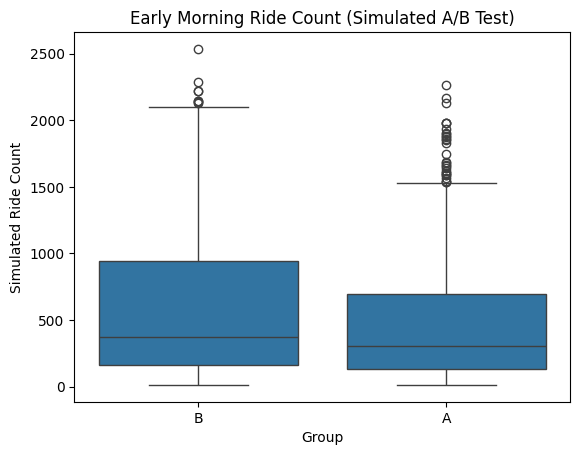

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='group', y='simulated_ride_count', data=ab_test_data)
plt.title("Early Morning Ride Count (Simulated A/B Test)")
plt.xlabel("Group")
plt.ylabel("Simulated Ride Count")
plt.show()
